<a href="https://colab.research.google.com/github/rpradhamesh/hand-gesture-vocalizer/blob/main/Copy_of_cnn_with_mediapipe_for_sign_language_recognition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Add Python module called Mediapipe
!pip install mediapipe
!pip install gTTS
!pip install playsound
!pip install pyttsx3

  Using cached mediapipe-0.10.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.6 MB)
  Using cached sounddevice-0.4.6-py3-none-any.whl (31 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.15.0'

In [ ]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.

                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0

                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0

                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0

                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0

                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0

                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0

                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0

                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0

                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0

                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0

                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0

                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0

                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0

                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0

                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0

                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0

                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0

                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)

            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z

                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z

                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z

                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z

                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z

                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z

                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z

                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z

                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z

                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z

                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z

                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z

                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z

                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z

                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z

                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [ ]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])

In [ ]:
# Extract Feature for Training
# We will using SIBI datasets version V02
paths = "/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training"
csv_path = "hands_SIBI_training.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist,
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")


The CSV file does not exist hands_SIBI_training.csv ,Going Create after Extraction
Inside Folder X Consist : 42 Imageset
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/A5E3251E-E429-4487-8EAD-55B7198884CD.jpg Hand does not have landmarks
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/IMG_20210605_174251.jpg Hand does not have landmarks
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/D0FC3384-8B1C-48EB-A9A1-5E43DE0D4ABE.jpg Hand does not have landmarks
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/1243756F-A4C6-4419-8773-4503E0B0A7D6.jpg Hand does not have landmarks
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/B012C360-2B48-4F35-98D6-ADF107F6508F.jpg Hand does not have landmarks
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEM

In [ ]:
# Extract Feature for Validation
# We will using SIBI datasets version V02
paths = "/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation"
csv_path = "hands_SIBI_validation.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist,
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for VALIDATION is Completed===================")

The CSV file does not exist hands_SIBI_validation.csv ,Going Create after Extraction
Inside Folder Z Consist : 9 Imageset
Inside Folder V Consist : 9 Imageset
Inside Folder W Consist : 10 Imageset
Inside Folder T Consist : 9 Imageset
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/T/IMG_20210605_174017.jpg Hand does not have landmarks
Inside Folder U Consist : 9 Imageset
Inside Folder X Consist : 9 Imageset
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/X/D387A9E7-6E91-447D-95C5-637E45855DFD.jpg Hand does not have landmarks
Inside Folder S Consist : 10 Imageset
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/S/IMG_20210605_173839.jpg Hand does not have landmarks
Inside Folder P Consist : 9 Imageset
/content/drive/MyDrive/Dataset mini project/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/P/IMG_20210605_173447.jpg Hand does not have la

In [ ]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_SIBI_training.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
1055,A,2724.964213,2182.124526,-5.130971e-07,2551.440182,2025.186607,-0.013851,2468.705549,1846.470806,-0.015171,...,0.007734,2923.799214,1688.172459,-0.001262,2866.963949,1800.668983,0.012156,2850.759387,1853.218017,0.026290
1031,A,606.054023,997.375075,-1.021726e-06,542.076766,975.887114,-0.016491,488.507777,912.039136,-0.018627,...,-0.025006,619.540125,819.681518,-0.043579,611.694351,864.091609,-0.022165,620.059937,878.709682,0.001092
1030,A,1198.422074,1468.153715,-1.746817e-06,812.747478,1363.759756,-0.061674,561.017632,1002.614021,-0.071301,...,-0.031390,1338.470459,623.377323,-0.082728,1287.087440,864.673376,-0.049932,1295.438647,947.528124,-0.008565
1029,A,760.192633,1698.229790,-1.417510e-06,576.017022,1466.855049,-0.038969,501.943231,1163.179040,-0.058258,...,-0.048053,1162.064791,1149.494171,-0.090149,1074.965477,1290.978193,-0.067157,1023.222208,1377.505302,-0.037085
1028,A,1593.135340,2003.049824,-1.917325e-06,1329.626807,1846.083207,-0.025695,1135.570690,1601.084763,-0.042078,...,-0.071267,1678.341120,1337.785852,-0.110229,1631.677766,1530.720809,-0.074036,1692.048390,1576.065932,-0.036066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Z,566.652954,1251.160741,6.702237e-07,614.344060,1226.109385,-0.183859,778.687596,1191.919446,-0.237034,...,0.021338,1151.374817,1147.697687,-0.047447,1042.171717,1215.212345,-0.054003,962.400556,1180.533409,-0.039160
138,Z,1898.107515,2736.010002,-2.339013e-08,1784.118155,2672.151833,-0.032564,1701.664209,2525.927605,-0.047559,...,-0.031735,2007.937941,2398.477798,-0.058660,1973.673240,2498.247871,-0.048096,1944.658896,2538.201736,-0.032119
139,Z,563.962698,1368.057847,2.174749e-07,701.363683,1290.065408,-0.121273,904.924273,1227.608442,-0.118002,...,0.124011,1108.835340,1212.349653,0.081539,1021.494508,1275.137901,0.062700,932.111442,1269.753933,0.067002
130,Z,2119.185061,2558.471191,7.088087e-08,2055.659838,2436.624360,-0.000316,1902.691054,2340.935918,-0.009536,...,-0.058521,1667.207079,2606.635705,-0.073744,1723.728991,2629.502631,-0.063216,1792.575831,2616.725294,-0.052037


In [ ]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("hands_SIBI_validation.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
195,A,1610.007216,1784.244035,-1.749235e-06,1369.551107,1709.763939,-0.042585,1148.568022,1496.684943,-0.062479,...,-0.052158,1657.078684,1124.223124,-0.091841,1640.837864,1317.483665,-0.057763,1681.879869,1367.191519,-0.020736
196,A,303.739804,3094.464386,2.659254e-07,373.745911,3178.373840,-0.009913,384.860658,3259.081604,-0.005684,...,0.074704,270.859761,3269.004730,0.101987,289.082896,3289.683472,0.118750,303.885542,3296.251648,0.130978
197,A,1001.917591,2460.414986,-1.745873e-06,696.420623,2391.251255,-0.063557,473.522128,2101.842831,-0.090448,...,-0.106785,1121.710753,1888.529938,-0.162875,1052.123890,2077.944557,-0.131850,1086.989165,2088.034092,-0.094612
198,A,1400.900648,1702.873454,-2.118501e-06,1028.172933,1624.134883,-0.053557,734.095906,1248.218762,-0.057151,...,-0.038765,1481.779665,778.683129,-0.081240,1443.578908,1019.761197,-0.032489,1509.308209,1059.469349,0.019744
199,A,626.763403,1036.431742,-1.010617e-06,557.352796,1013.014567,-0.019210,502.974451,940.376868,-0.019415,...,-0.026157,646.708667,850.894585,-0.045292,638.892889,895.978625,-0.022630,649.126634,910.227203,0.002203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Z,419.210538,803.868769,1.096723e-06,413.934454,797.199570,-0.082273,452.035010,781.144069,-0.114152,...,-0.026706,536.403179,793.232528,-0.078534,514.118895,812.784119,-0.085076,493.011877,825.354583,-0.075589
3,Z,1742.245886,2565.417858,2.051919e-07,1691.130518,2520.568737,-0.055253,1672.879678,2425.837498,-0.085446,...,-0.039117,1978.539119,2383.158772,-0.081821,1975.439507,2466.163536,-0.087077,1954.306755,2521.870468,-0.081235
2,Z,978.258835,1808.682939,1.032698e-06,945.240106,1858.198865,-0.115406,1007.911550,1893.381226,-0.177525,...,-0.064541,1375.261356,1773.544798,-0.110864,1278.846965,1821.096928,-0.110270,1192.650727,1793.069757,-0.099451
1,Z,225.809936,1833.965790,-2.816387e-08,222.703867,1968.020359,-0.245989,430.492136,2049.839344,-0.340612,...,-0.046377,1051.441130,1762.445869,-0.136769,910.413206,1864.165524,-0.133305,791.942445,1792.828480,-0.108018


In [ ]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [ ]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)


In [ ]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(1056, 63)
(212, 63)
(1056, 63, 1)
(212, 63, 1)


In [ ]:
# Check sample train and test features
print(x_train[0])
print(x_test[7])

[[2724.964]
 [2182.125]
 [  -0.   ]
 [2551.44 ]
 [2025.187]
 [  -0.014]
 [2468.706]
 [1846.471]
 [  -0.015]
 [2459.462]
 [1648.645]
 [  -0.019]
 [2474.181]
 [1504.3  ]
 [  -0.018]
 [2576.312]
 [1715.323]
 [   0.026]
 [2585.813]
 [1569.434]
 [   0.006]
 [2581.907]
 [1720.997]
 [   0.   ]
 [2591.823]
 [1780.545]
 [  -0.   ]
 [2694.913]
 [1730.285]
 [   0.025]
 [2696.794]
 [1598.996]
 [   0.003]
 [2672.529]
 [1775.423]
 [   0.   ]
 [2678.033]
 [1811.518]
 [   0.006]
 [2812.005]
 [1759.457]
 [   0.017]
 [2811.498]
 [1637.454]
 [  -0.008]
 [2767.336]
 [1809.004]
 [   0.004]
 [2764.157]
 [1860.26 ]
 [   0.02 ]
 [2926.368]
 [1804.38 ]
 [   0.008]
 [2923.799]
 [1688.172]
 [  -0.001]
 [2866.964]
 [1800.669]
 [   0.012]
 [2850.759]
 [1853.218]
 [   0.026]]
[[2897.191]
 [2222.108]
 [  -0.   ]
 [2689.501]
 [2016.967]
 [  -0.002]
 [2586.729]
 [1813.321]
 [   0.003]
 [2574.491]
 [1596.874]
 [   0.   ]
 [2577.469]
 [1438.478]
 [   0.003]
 [2724.919]
 [1650.914]
 [   0.057]
 [2706.72 ]
 [1486.708]
 [ 

In [ ]:
# Number of classes according standard Indonesian Language Alphabets
num_classes = 26

# Using the Keras.Utils to put the label categorically
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            5152      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 32)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 64)            10304     
                                                                 
 conv1d_3 (Conv1D)           (None, 31, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                   

In [ ]:
#Train the Model
model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/500
33/33 [==============================] - 2s 71ms/step - loss: 0.0872 - accuracy: 0.9744 - val_loss: 0.5590 - val_accuracy: 0.9198
Epoch 2/500
33/33 [==============================] - 2s 60ms/step - loss: 0.2023 - accuracy: 0.9479 - val_loss: 0.2825 - val_accuracy: 0.9245
Epoch 3/500
33/33 [==============================] - 2s 60ms/step - loss: 0.1003 - accuracy: 0.9706 - val_loss: 0.3195 - val_accuracy: 0.9387
Epoch 4/500
33/33 [==============================] - 2s 60ms/step - loss: 0.1002 - accuracy: 0.9688 - val_loss: 0.3541 - val_accuracy: 0.9198
Epoch 5/500
33/33 [==============================] - 2s 63ms/step - loss: 0.0878 - accuracy: 0.9650 - val_loss: 0.3537 - val_accuracy: 0.9387
Epoch 6/500
33/33 [==============================] - 3s 79ms/step - loss: 0.0398 - accuracy: 0.9848 - val_loss: 0.3209 - val_accuracy: 0.9434
Epoch 7/500
33/33 [==============================] - 2s 64ms/step - loss: 0.0431 - accuracy: 0.9820 - val_loss: 0.3429 - val_accuracy: 0.9481
Epoch 

In [ ]:
#Saving the model into H5 system file
save_model = "model_SIBI.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into model_SIBI.h5


In [ ]:
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

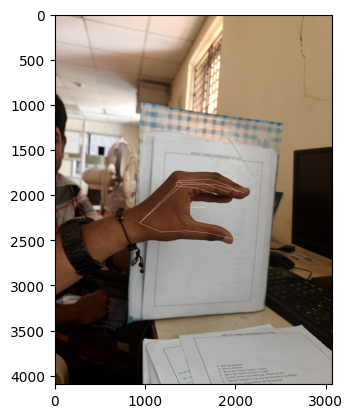

In [ ]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
path_to_image = "/content/C1.jpg"

(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image)

#print(wristX, wristY,
#      thumb_CmcX, thumb_CmcY, thumb_McpX, thumb_McpY, thumb_IpX, thumb_IpY, thumb_TipX, thumb_TipY,
#      index_McpX, index_McpY, index_PipX, index_PipY, index_DipX, index_DipY, index_TipX, index_TipY,
#      middle_McpX, middle_McpY, middle_PipX, middle_PipY, middle_DipX, middle_DipY, middle_TipX, middle_TipY,
#      ring_McpX, ring_McpY, ring_PipX, ring_PipY, ring_DipX, ring_DipY, ring_TipX, ring_TipY,
#      pinky_McpX, pinky_McpY, pinky_PipX, pinky_PipY, pinky_DipX, pinky_DipY, pinky_TipX, pinky_TipY)
plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
#Shape the image features into an 1x3 array.
input_IMG = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_IMG.shape)
print(input_IMG)

(1, 63, 1)
[[[ 933.163]
  [2312.906]
  [   0.   ]
  [1171.1  ]
  [2413.148]
  [  -0.084]
  [1452.039]
  [2399.891]
  [  -0.109]
  [1692.531]
  [2424.938]
  [  -0.111]
  [1906.524]
  [2476.369]
  [  -0.106]
  [1405.65 ]
  [1888.606]
  [  -0.074]
  [1760.639]
  [1884.001]
  [  -0.073]
  [1952.388]
  [1938.485]
  [  -0.075]
  [2085.539]
  [1976.35 ]
  [  -0.075]
  [1369.112]
  [1844.927]
  [  -0.022]
  [1711.76 ]
  [1829.303]
  [  -0.017]
  [1906.087]
  [1896.731]
  [  -0.02 ]
  [2021.526]
  [1969.494]
  [  -0.023]
  [1347.845]
  [1864.364]
  [   0.026]
  [1638.958]
  [1873.76 ]
  [   0.033]
  [1800.904]
  [1931.506]
  [   0.026]
  [1914.828]
  [1974.754]
  [   0.019]
  [1348.302]
  [1901.081]
  [   0.068]
  [1569.257]
  [1928.953]
  [   0.073]
  [1687.83 ]
  [1967.847]
  [   0.068]
  [1777.542]
  [1999.234]
  [   0.064]]]


In [ ]:
# Predict probabilities for each class
predictions = model.predict(input_IMG)

# Get the class with the highest probability for each prediction
predicted_classes = predictions.argmax(axis=-1)

print(predicted_classes)

1/1 [==============================] - 0s 19ms/step
[23]


In [ ]:
# Predict probabilities for each class
predictions_prob = model.predict(input_IMG)

# Get the index of the class with the highest probability
predicted_class_index = predictions_prob.argmax(axis=-1)[0]

# Find the corresponding alphabet for the predicted class index
predicted_alphabet = None
for alphabet, value in classes.items():
    if value == predicted_class_index:
        predicted_alphabet = alphabet
        break

if predicted_alphabet is not None:
    print("Possible Alphabet according to the input:", predicted_alphabet)
else:
    print("No matching alphabet found for the predicted class index.")


1/1 [==============================] - 0s 20ms/step
Possible Alphabet according to the input: X


In [ ]:
# Import the required module for text
# to speech conversion
from gtts import gTTS

# This module is imported so that we can
# play the converted audio
import os

# The text that you want to convert to audio
mytext = 'Predicted alphabet is ' +  predicted_alphabet

# Language in which you want to convert
language = 'en'

# Passing the text and language to the engine,
# here we have marked slow=False. Which tells
# the module that the converted audio should
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False)

# Saving the converted audio in a mp3 file named
# welcome
myobj.save("predicted.mp3")

# Playing the converted file
os.system("predicted.mp3")

32512